<a href="https://colab.research.google.com/github/ioiein/Network-science/blob/main/Competition1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import json

In [2]:
with open('stats[1].txt') as f:
  for line in f:
    stats = json.loads(line)

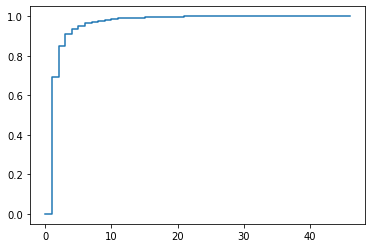

In [3]:
q_seq, p_seq = stats['degree_cdf']
plt.plot(
    np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
    np.repeat(p_seq, 2)
)
plt.show()

In [4]:
def ks_dist(G):
  degree_cdf = [0.0 for i in range(22)]
  for i in range(1882):
    ind = np.digitize(G.degree[i],stats['degree_cdf'][0]) - 1
    degree_cdf[ind] += (1/1882)
  a = np.array(degree_cdf)
  b = np.array(stats['degree_cdf'][1])
  return max(np.abs(a-b))

In [5]:
def gauss_kernel(stats, g):
  return np.exp(-(stats[0] - g)**2 / (2*stats[1]**2))

In [25]:
def score(G):
  Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  G0 = G.subgraph(Gcc[0])
  print("0")
  ks = ks_dist(G)
  print("1")
  gk1 = gauss_kernel(stats['radius'], nx.radius(G0))
  print("2")
  gk2 = gauss_kernel(stats['diameter'], nx.diameter(G0))
  print("3")
  print(nx.average_clustering(G))
  gk3 = gauss_kernel(stats['average_clustering'], nx.average_clustering(G))
  print("4")
  av_sh_path = []
  S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
  for s in S:
    av_sh_path.append(nx.average_shortest_path_length(s))
  gk4 = gauss_kernel(stats['average_path_length'], np.mean(av_sh_path))
  print("5")
  gk5 = gauss_kernel(stats['number_cc'], len(Gcc)) 
  print("6")
  print("KS: ", ks)
  print("Radius: ", gk1)
  print("Diameter: ", gk2)
  print("Avg clustering: ", gk3)
  print("Avg Path Len: ", gk4)
  print("Num CC: ", gk5)
  
  return (1/6) * ks + \
         (1/6) * gk1 + \
         (1/6) * gk2 + \
         (1/6) * gk3 + \
         (1/6) * gk4 + \
         (1/6) * gk5

In [ ]:
scores = []
for i in range(1000):
  degree_seq = []
  for j in range(1882):
    x = np.random.random()
    ind = np.digitize(x, stats['degree_cdf'][1])
    degree_seq.append(stats['degree_cdf'][0][ind])
  if np.sum(degree_seq) % 2 != 0:
    degree_seq[int(np.random.random()*1882)]+=1
  G = nx.configuration_model(degree_seq)
  G = nx.Graph(G)
  G.remove_edges_from(nx.selfloop_edges(G))
  scores.append([score(G), G])

Выходные данные были обрезаны до нескольких последних строк (5000).
0
1
2
3
0.002496866292787062
4
5
6
KS:  1.0
Radius:  0.011108996538242306
Diameter:  0.005086069231012701
Avg clustering:  0.036799349743807705
Avg Path Len:  7.52270152639427e-07
Num CC:  2.265086538322931e-05
0
1
2
3
0.001386082439182141
4
5
6
KS:  1.0
Radius:  0.04393693362340742
Diameter:  0.07955950871822769
Avg clustering:  0.0011433023575621066
Avg Path Len:  7.74842764632434e-07
Num CC:  8.041000588185198e-06
0
1
2
3
0.0006709424381132354
4
5
6
KS:  1.0
Radius:  0.011108996538242306
Diameter:  0.04393693362340742
Avg clustering:  6.367146143657242e-05
Avg Path Len:  7.781129709437212e-07
Num CC:  6.908123638278764e-06
0
1
2
3
0.0016118885277088722
4
5
6
KS:  1.0
Radius:  0.6065306597126334
Diameter:  0.7548396019890073
Avg clustering:  0.0025588417700772377
Avg Path Len:  7.638969488620311e-07
Num CC:  1.6931612436129992e-05
0
1
2
3
0.0009460417845306657
4
5
6
KS:  0.9994686503719448
Radius:  0.0111089965382423

In [28]:
degree_seq = []
for j in range(1882):
  x = np.random.random()
  ind = np.digitize(x, stats['degree_cdf'][1])
  degree_seq.append(stats['degree_cdf'][0][ind])
if np.sum(degree_seq) % 2 != 0:
  degree_seq[int(np.random.random()*1882)]+=1
G = nx.configuration_model(degree_seq)
G = nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))

In [29]:
score(G)

0
1
2
3
0.000682750996992987
4
5
6
KS:  0.9994686503719448
Radius:  0.04393693362340742
Diameter:  0.07955950871822769
Avg clustering:  6.705917563960881e-05
Avg Path Len:  7.271175621080385e-07
Num CC:  6.082440014952599e-05


0.18718228390115518